# Import Statements

In [1]:
import os
import pandas as pd
import numpy as np
import pickle

from shapely.ops import cascaded_union
import geopandas as gpd

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap
import geoplot
import plotly.graph_objects as go
import plotly.express as px

# Load from pickle

In [2]:
os.chdir('../data/pickle')

# state shapes
file = open("states.pickle",'rb')
states = pickle.load(file)
file.close()
# grid state shapes
file = open("grid_states.pickle",'rb')
grid_states = pickle.load(file)
file.close()
#combined with cutout
file = open("combine_solar_coal.pickle",'rb')
combine_solar_coal = pickle.load(file)
file.close()
file = open("combine_wind_coal.pickle",'rb')
combine_wind_coal = pickle.load(file)
file.close()

os.chdir('../../outputs/tables')
# state heatmap data
file = open("solar_cf_coal_summary_30.pickle","rb")
solar_cf_coal_summary_30 = pickle.load(file)
file.close()
file = open("solar_lcoe_coal_summary_30.pickle","rb")
solar_lcoe_coal_summary_30 = pickle.load(file)
file.close()
file = open("wind_cf_coal_summary_30.pickle","rb")
wind_cf_coal_summary_30 = pickle.load(file)
file.close()
file = open("wind_lcoe_coal_summary_30.pickle","rb")
wind_lcoe_coal_summary_30 = pickle.load(file)
file.close()
file = open("solar_cf_coal_summary_50.pickle","rb")
solar_cf_coal_summary_50 = pickle.load(file)
file.close()
file = open("solar_lcoe_coal_summary_50.pickle","rb")
solar_lcoe_coal_summary_50 = pickle.load(file)
file.close()
file = open("wind_cf_coal_summary_50.pickle","rb")
wind_cf_coal_summary_50 = pickle.load(file)
file.close()
file = open("wind_lcoe_coal_summary_50.pickle","rb")
wind_lcoe_coal_summary_50 = pickle.load(file)
file.close()
file = open("solar_high_cf_summary_30.pickle","rb")
solar_high_cf_summary_30 = pickle.load(file)
file.close()
file = open("solar_high_lcoe_summary_30.pickle","rb")
solar_high_lcoe_summary_30 = pickle.load(file)
file.close()
file = open("solar_high_cf_summary_50.pickle","rb")
solar_high_cf_summary_50 = pickle.load(file)
file.close()
file = open("solar_high_lcoe_summary_50.pickle","rb")
solar_high_lcoe_summary_50 = pickle.load(file)
file.close()
file = open("wind_high_cf_summary_30.pickle","rb")
wind_high_cf_summary_30 = pickle.load(file)
file.close()
file = open("wind_high_lcoe_summary_30.pickle","rb")
wind_high_lcoe_summary_30 = pickle.load(file)
file.close()
file = open("wind_high_cf_summary_50.pickle","rb")
wind_high_cf_summary_50 = pickle.load(file)
file.close()
file = open("wind_high_lcoe_summary_50.pickle","rb")
wind_high_lcoe_summary_50 = pickle.load(file)
file.close()
file = open("solar_all_cf_summary_30.pickle","rb")
solar_all_cf_summary_30 = pickle.load(file)
file.close()
file = open("solar_all_lcoe_summary_30.pickle","rb")
solar_all_lcoe_summary_30 = pickle.load(file)
file.close()
file = open("solar_all_cf_summary_50.pickle","rb")
solar_all_cf_summary_50 = pickle.load(file)
file.close()
file = open("solar_all_lcoe_summary_50.pickle","rb")
solar_all_lcoe_summary_50 = pickle.load(file)
file.close()
file = open("wind_all_cf_summary_30.pickle","rb")
wind_all_cf_summary_30 = pickle.load(file)
file.close()
file = open("wind_all_lcoe_summary_30.pickle","rb")
wind_all_lcoe_summary_30 = pickle.load(file)
file.close()
file = open("wind_all_cf_summary_50.pickle","rb")
wind_all_cf_summary_50 = pickle.load(file)
file.close()
file = open("wind_all_lcoe_summary_50.pickle","rb")
wind_all_lcoe_summary_50 = pickle.load(file)
file.close()

os.chdir('../plots')

In [3]:
top_states = ['Rajasthan', 'Gujarat', 'Andhra Pradesh', 
              'Madhya Pradesh', 'Maharashtra', 'Telangana', 
              'Karnataka', 'Kerala', 'Tamil Nadu']

In [4]:
cmap = cm.RdBu
cmap_reversed = cm.get_cmap('RdBu_r')

# CF/LCOE Plots: All India

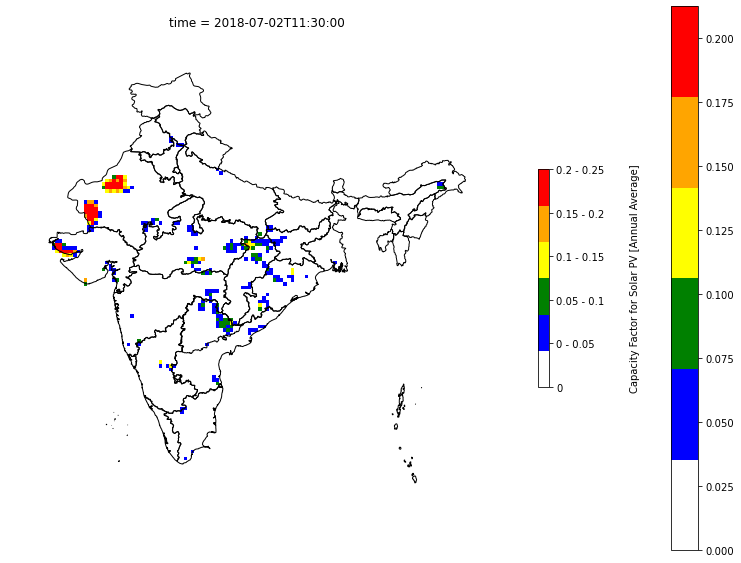

In [5]:
out = combine_solar_coal['coal']['solar'] * combine_solar_coal['coal']['mask']

col_dict = {
    0: "white",
    1: "blue",
    2: "green",
    3: "yellow",
    4: "orange",
    5: "red"
}

cm = ListedColormap([col_dict[x] for x in col_dict.keys()])

labels = np.array(['0', '0 - 0.05', '0.05 - 0.1', '0.1 - 0.15', '0.15 - 0.2', '0.2 - 0.25'])
norm_bins = [-0.05, 0, 0.05, 0.1, 0.15, 0.2, 0.25]
norm = matplotlib.colors.BoundaryNorm(norm_bins, len(labels))

fig = plt.figure(figsize = (14, 10))
ax = fig.add_subplot()

a = out.plot(
    ax=ax,
    cmap=cm,
    zorder=-1
)

b = geoplot.polyplot(
    gpd.GeoSeries(states),
    ax=ax
)

cbar = fig.colorbar(a, shrink=0.4)
cbar.set_ticks(np.linspace(0, max(out.values.flatten()), len(labels)))
cbar.set_ticklabels(labels)
cbar.set_label("Capacity Factor for Solar PV [Annual Average]", labelpad=25)

ax.get_figure().savefig("solar_cf_suitability_coal_mask.png")

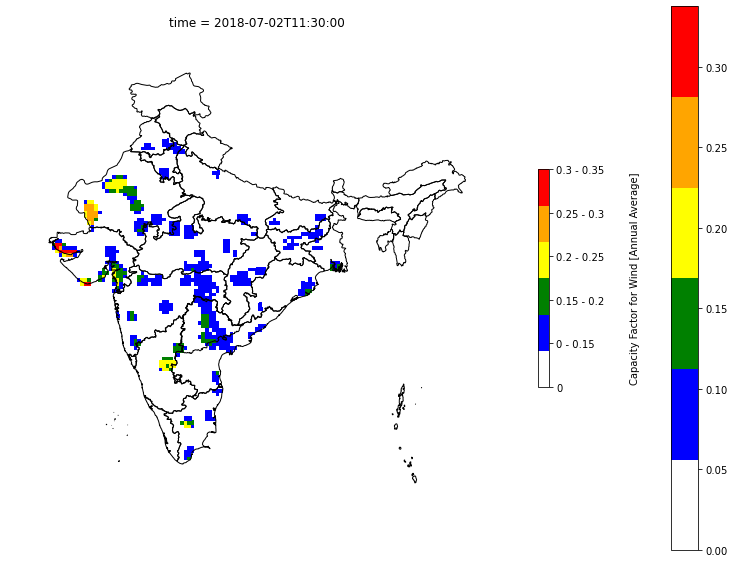

In [6]:
out = combine_wind_coal['coal']['wind'] * combine_wind_coal['coal']['mask']

col_dict = {
    0: "white",
    1: "blue",
    2: "green",
    3: "yellow",
    4: "orange",
    5: "red"
}

cm = ListedColormap([col_dict[x] for x in col_dict.keys()])

labels = np.array(['0', '0 - 0.15', '0.15 - 0.2', '0.2 - 0.25', '0.25 - 0.3', '0.3 - 0.35'])
norm_bins = [-0.05, 0, 0.15, 0.2, 0.25, 0.3, 0.35]
norm = matplotlib.colors.BoundaryNorm(norm_bins, len(labels))

fig = plt.figure(figsize = (14, 10))
ax = fig.add_subplot()

a = out.plot(
    ax=ax,
    cmap=cm,
    zorder=-1
)

b = geoplot.polyplot(
    gpd.GeoSeries(states),
    ax=ax
)

cbar = fig.colorbar(a, shrink=0.4)
cbar.set_ticks(np.linspace(0, max(out.values.flatten()), len(labels)))
cbar.set_ticklabels(labels)
cbar.set_label("Capacity Factor for Wind [Annual Average]", labelpad=25)

ax.get_figure().savefig("wind_cf_suitability_coal_mask.png")

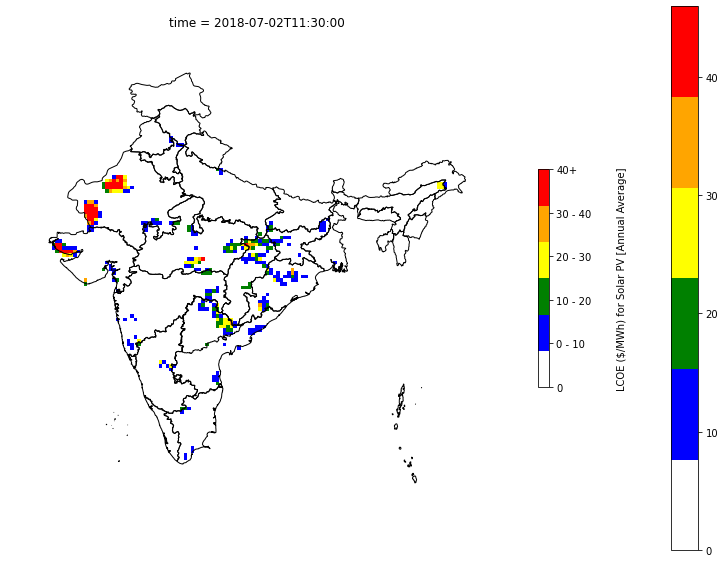

In [7]:
out = combine_solar_coal['coal']['LCOE ($/MWh) mid'] * combine_solar_coal['coal']['mask']

col_dict = {
    0: "white",
    1: "blue",
    2: "green",
    3: "yellow",
    4: "orange",
    5: "red"
}

cm = ListedColormap([col_dict[x] for x in col_dict.keys()])

labels = np.array(['0', '0 - 10', '10 - 20', '20 - 30', '30 - 40', '40+'])
norm_bins = [-0.05, 0, 10, 20, 30, 40, 120]
norm = matplotlib.colors.BoundaryNorm(norm_bins, len(labels))

fig = plt.figure(figsize = (14, 10))
ax = fig.add_subplot()

a = out.plot(
    ax=ax,
    cmap=cm,
    zorder=-1
)

b = geoplot.polyplot(
    gpd.GeoSeries(states),
    ax=ax
)

cbar = fig.colorbar(a, shrink=0.4)
cbar.set_ticks(np.linspace(0, max(out.values.flatten()), len(labels)))
cbar.set_ticklabels(labels)
cbar.set_label("LCOE ($/MWh) for Solar PV [Annual Average]", labelpad=25)

ax.get_figure().savefig("solar_lcoe_suitability_coal_mask.png")

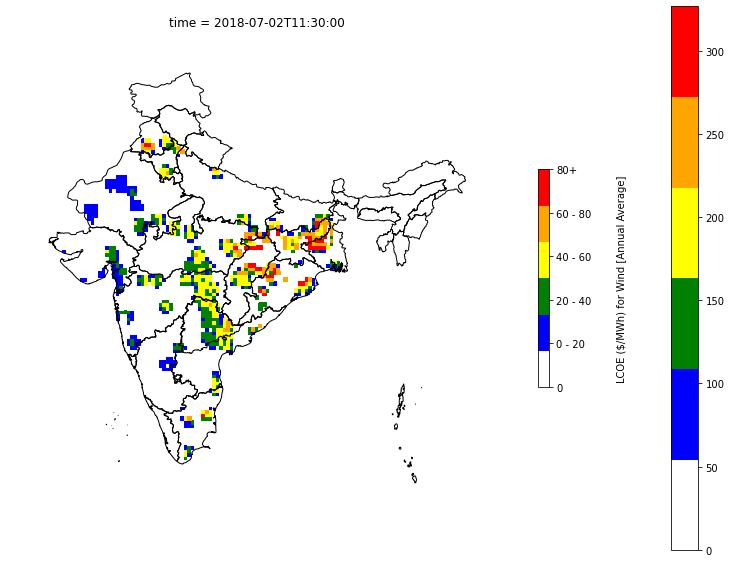

In [8]:
out = combine_wind_coal['coal']['LCOE ($/MWh) mid'] * combine_wind_coal['coal']['mask']

col_dict = {
    0: "white",
    1: "blue",
    2: "green",
    3: "yellow",
    4: "orange",
    5: "red"
}

cm = ListedColormap([col_dict[x] for x in col_dict.keys()])

labels = np.array(['0', '0 - 20', '20 - 40', '40 - 60', '60 - 80', '80+'])
norm_bins = [-0.05, 0, 20, 40, 60, 80, 300]
norm = matplotlib.colors.BoundaryNorm(norm_bins, len(labels))

fig = plt.figure(figsize = (14, 10))
ax = fig.add_subplot()

a = out.plot(
    ax=ax,
    cmap=cm,
    zorder=-1
)

b = geoplot.polyplot(
    gpd.GeoSeries(states),
    ax=ax
)

cbar = fig.colorbar(a, shrink=0.4)
cbar.set_ticks(np.linspace(0, max(out.values.flatten()), len(labels)))
cbar.set_ticklabels(labels)
cbar.set_label("LCOE ($/MWh) for Wind [Annual Average]", labelpad=25)

ax.get_figure().savefig("wind_lcoe_suitability_coal_mask.png")

# Mean CF/LCOE: Top States

In [9]:
# plot heatmap
out1 = solar_cf_coal_summary_30.loc[top_states]['Medium PF']
out2 = solar_cf_coal_summary_50.loc[top_states]['Medium PF']
out3 = wind_cf_coal_summary_30.loc[top_states]['Medium PF']
out4 = wind_cf_coal_summary_50.loc[top_states]['Medium PF']
out = pd.concat([out1, out2, out3, out4], axis=1)
out.columns = ['Solar 2030', 'Solar 2050', 'Wind 2030', 'Wind 2050']

fig = px.bar(out, barmode='group')
fig.update_layout(
    title="Mean CFs within 50km radius of Coal Infrastructure in Top States",
    xaxis_title="Top States",
    yaxis_title="CF %"
)
fig.show()
fig.write_image("mean_cf_bar_coal.png")

In [10]:
# plot heatmap
out1 = solar_lcoe_coal_summary_30.loc[top_states]['Medium WACC Medium PF']
out2 = solar_lcoe_coal_summary_50.loc[top_states]['Medium WACC Medium PF']
out3 = wind_lcoe_coal_summary_30.loc[top_states]['Medium WACC Medium PF']
out4 = wind_lcoe_coal_summary_50.loc[top_states]['Medium WACC Medium PF']
out = pd.concat([out1, out2, out3, out4], axis=1)
out.columns = ['Solar 2030', 'Solar 2050', 'Wind 2030', 'Wind 2050']

fig = px.bar(out, barmode='group')
fig.update_layout(
    title="Mean LCOEs within 50km radius of Coal Infrastructure in Top State",
    xaxis_title="Top States",
    yaxis_title="LCOE ($/MWh)"
)
fig.show()
fig.write_image("mean_lcoe_bar_coal.png")

# State Calculations

In [11]:
missing = states.keys() - set(solar_cf_coal_summary_30.index)

for state in missing:
    solar_cf_coal_summary_30.loc[state] = 0
    solar_lcoe_coal_summary_30.loc[state] = 0
    solar_cf_coal_summary_50.loc[state] = 0
    solar_lcoe_coal_summary_50.loc[state] = 0
    wind_cf_coal_summary_30.loc[state] = 0
    wind_lcoe_coal_summary_30.loc[state] = 0
    wind_cf_coal_summary_50.loc[state] = 0
    wind_lcoe_coal_summary_50.loc[state] = 0
    solar_all_cf_summary_30.loc[state] = 0
    solar_all_lcoe_summary_30.loc[state] = 0
    solar_all_cf_summary_50.loc[state] = 0
    solar_all_lcoe_summary_50.loc[state] = 0
    wind_all_cf_summary_30.loc[state] = 0
    wind_all_lcoe_summary_30.loc[state] = 0
    wind_all_cf_summary_50.loc[state] = 0
    wind_all_lcoe_summary_50.loc[state] = 0
    
solar_cf_30_premium = solar_cf_coal_summary_30 - solar_all_cf_summary_30
wind_cf_30_premium = wind_cf_coal_summary_30 - wind_all_cf_summary_30
solar_cf_50_premium = solar_cf_coal_summary_50 - solar_all_cf_summary_50
wind_cf_50_premium = wind_cf_coal_summary_50 - wind_all_cf_summary_50
solar_lcoe_30_premium = solar_lcoe_coal_summary_30 - solar_all_lcoe_summary_30
wind_lcoe_30_premium = wind_lcoe_coal_summary_30 - wind_all_lcoe_summary_30
solar_lcoe_50_premium = solar_lcoe_coal_summary_50 - solar_all_lcoe_summary_50
wind_lcoe_50_premium = wind_lcoe_coal_summary_50 - wind_all_lcoe_summary_50

solar_cf_30_premium_per = (wind_cf_30_premium / solar_all_cf_summary_30) * 100
wind_cf_30_premium_per = (wind_cf_30_premium / wind_all_cf_summary_30) * 100
solar_cf_50_premium_per = (solar_cf_50_premium / solar_all_cf_summary_50) * 100
wind_cf_50_premium_per = (wind_cf_50_premium / wind_all_cf_summary_50) * 100
solar_lcoe_30_premium_per = (solar_lcoe_30_premium / solar_all_lcoe_summary_30) * 100
wind_lcoe_30_premium_per = (wind_lcoe_30_premium / wind_all_lcoe_summary_30) * 100
solar_lcoe_50_premium_per = (solar_lcoe_50_premium / solar_all_lcoe_summary_50) * 100
wind_lcoe_50_premium_per = (wind_lcoe_50_premium / wind_all_lcoe_summary_50) * 100

solar_cf_30_premium = solar_cf_30_premium.fillna(0)
wind_cf_30_premium = wind_cf_30_premium.fillna(0)
solar_cf_50_premium = solar_cf_50_premium.fillna(0)
wind_cf_50_premium = wind_cf_50_premium.fillna(0)
solar_lcoe_30_premium = solar_lcoe_30_premium.fillna(0)
wind_lcoe_30_premium = wind_lcoe_30_premium.fillna(0)
solar_lcoe_50_premium = solar_lcoe_50_premium.fillna(0)
wind_lcoe_50_premium = wind_lcoe_50_premium.fillna(0)
solar_cf_30_premium_per = solar_cf_30_premium_per.fillna(0)
wind_cf_30_premium_per = wind_cf_30_premium_per.fillna(0)
solar_cf_50_premium_per = solar_cf_50_premium_per.fillna(0)
wind_cf_50_premium_per = wind_cf_50_premium_per.fillna(0)
solar_lcoe_30_premium_per = solar_lcoe_30_premium_per.fillna(0)
wind_lcoe_30_premium_per = wind_lcoe_30_premium_per.fillna(0)
solar_lcoe_50_premium_per = solar_lcoe_50_premium_per.fillna(0)
wind_lcoe_50_premium_per = wind_lcoe_50_premium_per.fillna(0)

# Cost Premium Analysis

In [12]:
out1 = solar_lcoe_30_premium_per.loc[top_states]['Medium WACC Medium PF']
out2 = solar_lcoe_50_premium_per.loc[top_states]['Medium WACC Medium PF']
out3 = wind_lcoe_30_premium_per.loc[top_states]['Medium WACC Medium PF']
out4 = wind_lcoe_50_premium_per.loc[top_states]['Medium WACC Medium PF']
out = pd.concat([out1, out2, out3, out4], axis=1)
out.columns = ['Solar 2030', 'Solar 2050', 'Wind 2030', 'Wind 2050']

fig = px.bar(out, barmode='group')
fig.update_layout(
    title="Cost Premium associated with Citing New Wind and Solar in High Coal Incumbency Districts in Top States",
    xaxis_title="Top States",
    yaxis_title="LCOE % Gain"
)
fig.show()
fig.write_image("coal_cost_premium.png")

# Combine Summaries

In [13]:
solar_cf_coal_summary_30 = solar_cf_coal_summary_30[['Medium PF']]
solar_cf_coal_summary_30.columns = ['Alternative Specification']
solar_high_cf_summary_30 = solar_high_cf_summary_30[['Medium PF']]
solar_high_cf_summary_30.columns = ['Original Specification']
solar_cf_coal_summary_30 = solar_cf_coal_summary_30.join(solar_high_cf_summary_30)
solar_cf_coal_summary_30 = solar_cf_coal_summary_30.dropna()

solar_cf_coal_summary_50 = solar_cf_coal_summary_50[['Medium PF']]
solar_cf_coal_summary_50.columns = ['Alternative Specification']
solar_high_cf_summary_50 = solar_high_cf_summary_50[['Medium PF']]
solar_high_cf_summary_50.columns = ['Original Specification']
solar_cf_coal_summary_50 = solar_cf_coal_summary_50.join(solar_high_cf_summary_50)
solar_cf_coal_summary_50 = solar_cf_coal_summary_50.dropna()

wind_cf_coal_summary_30 = wind_cf_coal_summary_30[['Medium PF']]
wind_cf_coal_summary_30.columns = ['Alternative Specification']
wind_high_cf_summary_30 = wind_high_cf_summary_30[['Medium PF']]
wind_high_cf_summary_30.columns = ['Original Specification']
wind_cf_coal_summary_30 = wind_cf_coal_summary_30.join(wind_high_cf_summary_30)
wind_cf_coal_summary_30 = wind_cf_coal_summary_30.dropna()

wind_cf_coal_summary_50 = wind_cf_coal_summary_50[['Medium PF']]
wind_cf_coal_summary_50.columns = ['Alternative Specification']
wind_high_cf_summary_50 = wind_high_cf_summary_50[['Medium PF']]
wind_high_cf_summary_50.columns = ['Original Specification']
wind_cf_coal_summary_50 = wind_cf_coal_summary_50.join(wind_high_cf_summary_50)
wind_cf_coal_summary_50 = wind_cf_coal_summary_50.dropna()

solar_lcoe_coal_summary_30 = solar_lcoe_coal_summary_30[['Medium WACC Medium PF']]
solar_lcoe_coal_summary_30.columns = ['Alternative Specification']
solar_high_lcoe_summary_30 = solar_high_lcoe_summary_30[['Medium WACC Medium PF']]
solar_high_lcoe_summary_30.columns = ['Original Specification']
solar_lcoe_coal_summary_30 = solar_lcoe_coal_summary_30.join(solar_high_lcoe_summary_30)
solar_lcoe_coal_summary_30 = solar_lcoe_coal_summary_30.dropna()

solar_lcoe_coal_summary_50 = solar_lcoe_coal_summary_50[['Medium WACC Medium PF']]
solar_lcoe_coal_summary_50.columns = ['Alternative Specification']
solar_high_lcoe_summary_50 = solar_high_lcoe_summary_50[['Medium WACC Medium PF']]
solar_high_lcoe_summary_50.columns = ['Original Specification']
solar_lcoe_coal_summary_50 = solar_lcoe_coal_summary_50.join(solar_high_lcoe_summary_50)
solar_lcoe_coal_summary_50 = solar_lcoe_coal_summary_50.dropna()

wind_lcoe_coal_summary_30 = wind_lcoe_coal_summary_30[['Medium WACC Medium PF']]
wind_lcoe_coal_summary_30.columns = ['Alternative Specification']
wind_high_lcoe_summary_30 = wind_high_lcoe_summary_30[['Medium WACC Medium PF']]
wind_high_lcoe_summary_30.columns = ['Original Specification']
wind_lcoe_coal_summary_30 = wind_lcoe_coal_summary_30.join(wind_high_lcoe_summary_30)
wind_lcoe_coal_summary_30 = wind_lcoe_coal_summary_30.dropna()

wind_lcoe_coal_summary_50 = wind_lcoe_coal_summary_50[['Medium WACC Medium PF']]
wind_lcoe_coal_summary_50.columns = ['Alternative Specification']
wind_high_lcoe_summary_50 = wind_high_lcoe_summary_50[['Medium WACC Medium PF']]
wind_high_lcoe_summary_50.columns = ['Original Specification']
wind_lcoe_coal_summary_50 = wind_lcoe_coal_summary_50.join(wind_high_lcoe_summary_50)
wind_lcoe_coal_summary_50 = wind_lcoe_coal_summary_50.dropna()

## Plot State Averages

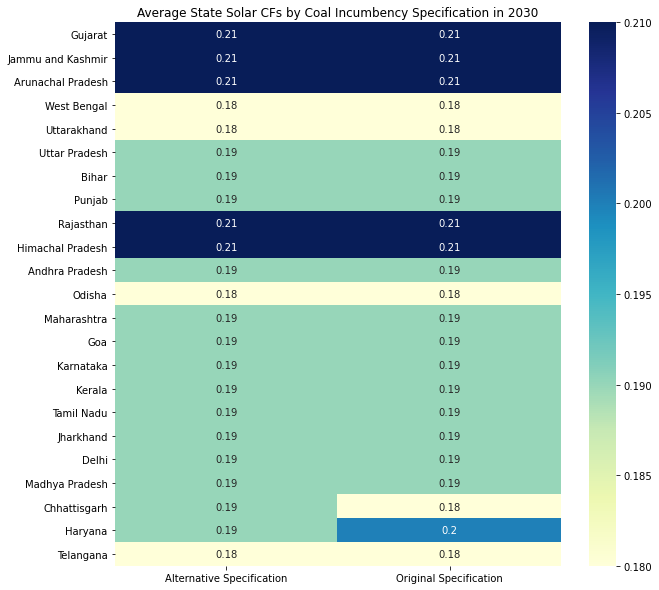

In [14]:
# plot heatmap
fig, ax = plt.subplots(figsize=(10,10))         
ax = sns.heatmap(solar_cf_coal_summary_30, annot=True, fmt=".4", cmap="YlGnBu")
plt.title("Average State Solar CFs by Coal Incumbency Specification in 2030")
fig.savefig("coal_grid_solar_cf_summary_30.png")

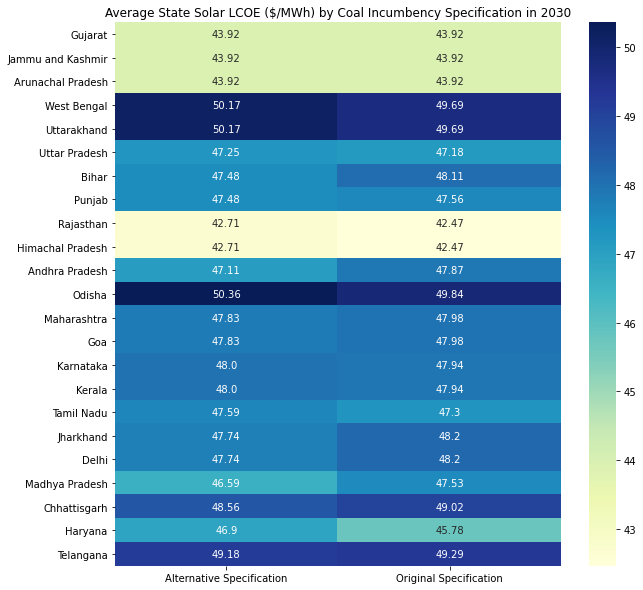

In [15]:
# plot heatmap
fig, ax = plt.subplots(figsize=(10,10))         
ax = sns.heatmap(solar_lcoe_coal_summary_30, annot=True, fmt=".4", cmap="YlGnBu")
plt.title("Average State Solar LCOE ($/MWh) by Coal Incumbency Specification in 2030")
fig.savefig("coal_grid_solar_lcoe_summary_30.png")

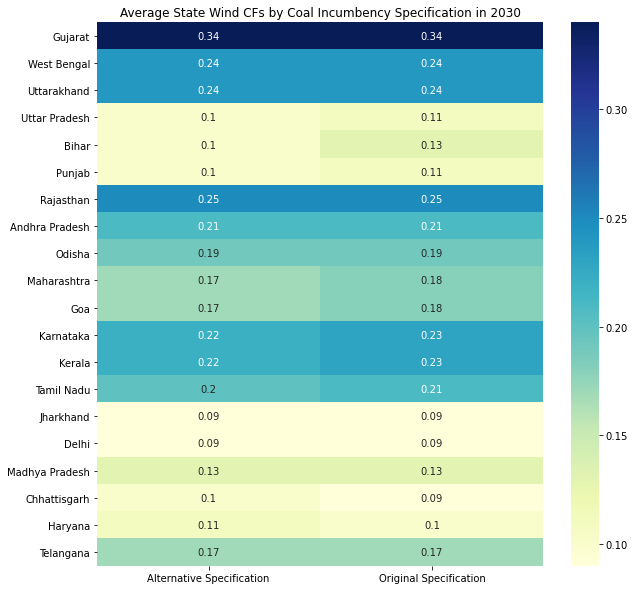

In [16]:
# plot heatmap
fig, ax = plt.subplots(figsize=(10,10))         
ax = sns.heatmap(wind_cf_coal_summary_30, annot=True, fmt=".4", cmap="YlGnBu")
plt.title("Average State Wind CFs by Coal Incumbency Specification in 2030")
fig.savefig("coal_grid_wind_cf_summary_30.png")

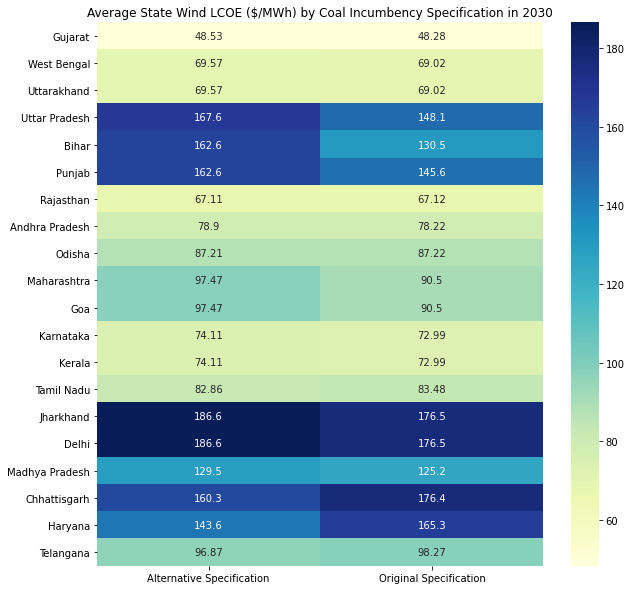

In [17]:
# plot heatmap
fig, ax = plt.subplots(figsize=(10,10))         
ax = sns.heatmap(wind_lcoe_coal_summary_30, annot=True, fmt=".4", cmap="YlGnBu")
plt.title("Average State Wind LCOE ($/MWh) by Coal Incumbency Specification in 2030")
fig.savefig("coal_grid_wind_lcoe_summary_30.png")

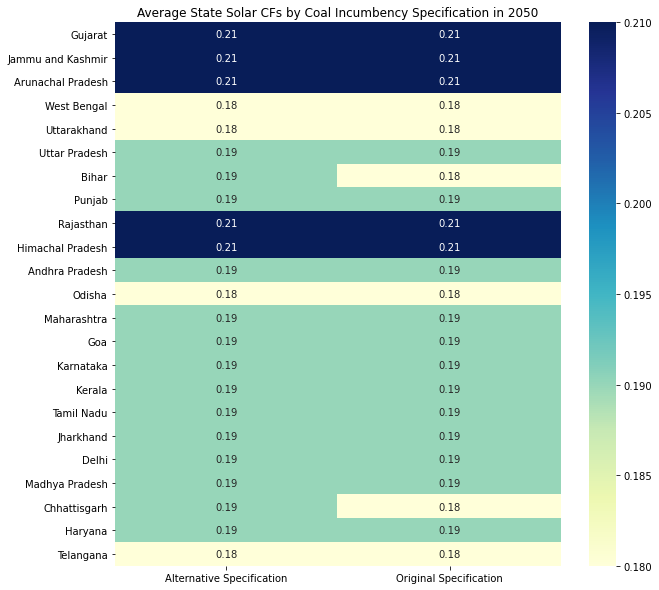

In [18]:
# plot heatmap
fig, ax = plt.subplots(figsize=(10,10))         
ax = sns.heatmap(solar_cf_coal_summary_50, annot=True, fmt=".4", cmap="YlGnBu")
plt.title("Average State Solar CFs by Coal Incumbency Specification in 2050")
fig.savefig("coal_grid_solar_cf_summary_50.png")

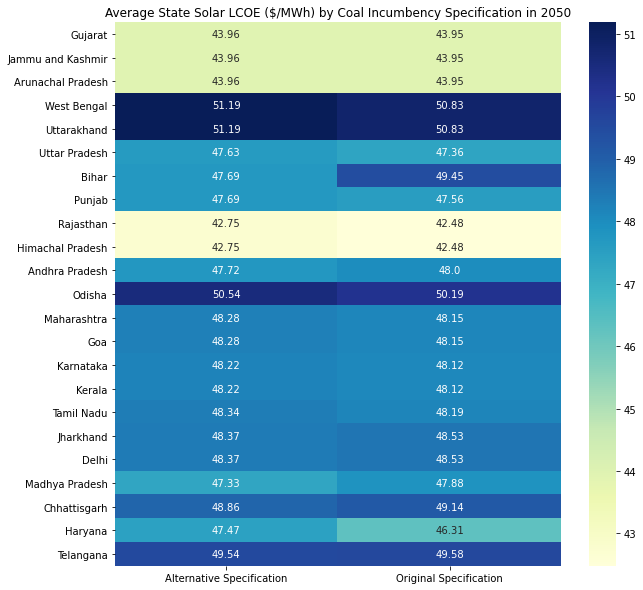

In [19]:
# plot heatmap
fig, ax = plt.subplots(figsize=(10,10))         
ax = sns.heatmap(solar_lcoe_coal_summary_50, annot=True, fmt=".4", cmap="YlGnBu")
plt.title("Average State Solar LCOE ($/MWh) by Coal Incumbency Specification in 2050")
fig.savefig("coal_grid_solar_lcoe_summary_50.png")

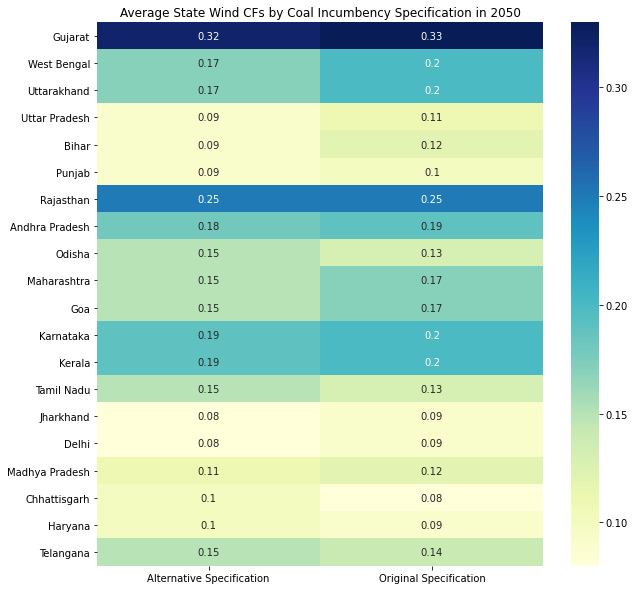

In [20]:
# plot heatmap
fig, ax = plt.subplots(figsize=(10,10))         
ax = sns.heatmap(wind_cf_coal_summary_50, annot=True, fmt=".4", cmap="YlGnBu")
plt.title("Average State Wind CFs by Coal Incumbency Specification in 2050")
fig.savefig("coal_grid_wind_cf_summary_50.png")

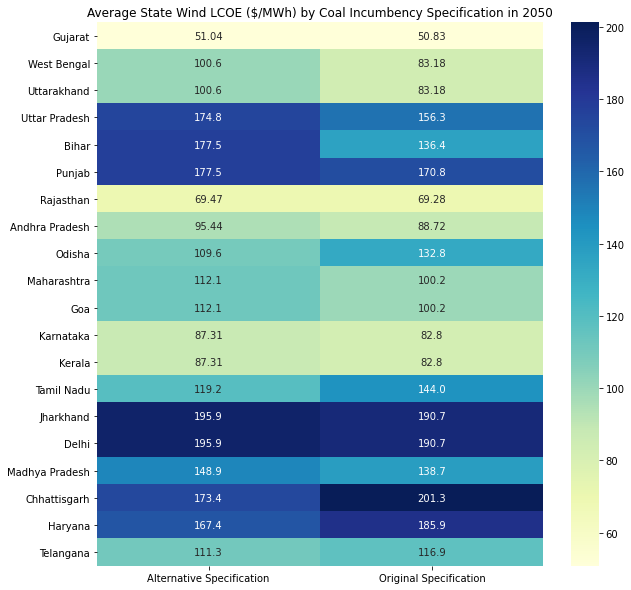

In [21]:
# plot heatmap
fig, ax = plt.subplots(figsize=(10,10))         
ax = sns.heatmap(wind_lcoe_coal_summary_50, annot=True, fmt=".4", cmap="YlGnBu")
plt.title("Average State Wind LCOE ($/MWh) by Coal Incumbency Specification in 2050")
fig.savefig("coal_grid_wind_lcoe_summary_50.png")